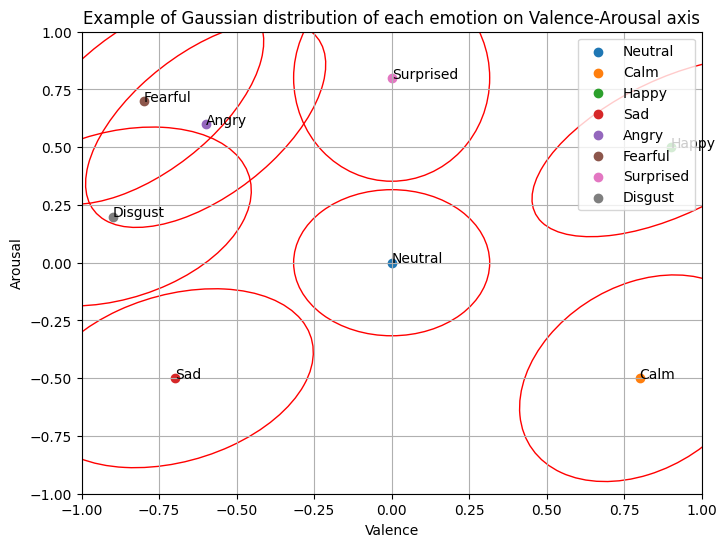

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# 感情とそれに対応する平均、分散、共分散
emotions = {
    "Neutral": {"mean": (0, 0), "var": (0.1, 0.1), "cov": 0},
    "Calm": {"mean": (0.8, -0.5), "var": (0.15, 0.2), "cov": 0.05},
    "Happy": {"mean": (0.9, 0.5), "var": (0.2, 0.15), "cov": 0.1},
    "Sad": {"mean": (-0.7, -0.5), "var": (0.2, 0.15), "cov": -0.05},
    "Angry": {"mean": (-0.6, 0.6), "var": (0.15, 0.2), "cov": 0.1},
    "Fearful": {"mean": (-0.8, 0.7), "var": (0.15, 0.2), "cov": 0.1},
    "Surprised": {"mean": (0, 0.8), "var": (0.1, 0.2), "cov": 0},
    "Disgust": {"mean": (-0.9, 0.2), "var": (0.2, 0.15), "cov": -0.05}
}

# グラフの作成
plt.figure(figsize=(8, 6))
ax = plt.gca()

for emotion, data in emotions.items():
    mean = data["mean"]
    var = data["var"]
    cov = data["cov"]

    # 楕円の描画
    lambda_, v = np.linalg.eig(np.array([[var[0], cov], [cov, var[1]]]))
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=mean, width=lambda_[0]*2, height=lambda_[1]*2, angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)

    # 感情の平均位置に点をプロット
    plt.scatter(*mean, label=emotion)
    plt.text(mean[0], mean[1], emotion)

# 軸のラベル
plt.xlabel('Valence')
plt.ylabel('Arousal')

# グリッドの表示
plt.grid(True)

# 軸の範囲
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# タイトルの追加
plt.title('Example of Gaussian distribution of each emotion on Valence-Arousal axis')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()


In [10]:
import os
import numpy as np

# 感情とそれに対応する平均、分散、共分散
emotions = {
    "01": {"mean": (0, 0), "var": (0.1, 0.1), "cov": 0},
    "02": {"mean": (0.8, -0.5), "var": (0.15, 0.2), "cov": 0.05},
    "03": {"mean": (0.9, 0.5), "var": (0.2, 0.15), "cov": 0.1},
    "04": {"mean": (-0.7, -0.5), "var": (0.2, 0.15), "cov": -0.05},
    "05": {"mean": (-0.6, 0.6), "var": (0.15, 0.2), "cov": 0.1},
    "06": {"mean": (-0.8, 0.7), "var": (0.15, 0.2), "cov": 0.1},
    "07": {"mean": (0, 0.8), "var": (0.1, 0.2), "cov": 0},
    "08": {"mean": (-0.9, 0.2), "var": (0.2, 0.15), "cov": -0.05}
}

def sample_emotion(emotion_code, num_samples=300):
    """ 指定された感情コードに基づいてサンプリングを行う """
    emotion = emotions[emotion_code]
    mean = emotion["mean"]
    cov_matrix = [[emotion["var"][0], emotion["cov"]], [emotion["cov"], emotion["var"][1]]]
    cov_matrix = np.array(cov_matrix) * 0.05
    return np.random.multivariate_normal(mean, cov_matrix, num_samples)

def extract_emotion_from_filename(filename):
    """ ファイル名から感情コードを抽出する """
    return filename.split('-')[2]

# フォルダパス
input_folder = '/home/zhangzehang2/emotion/audio-txt4/Male'
output_folder = '/home/zhangzehang2/emotion/interoception-txt1/Male'

# フォルダ内のすべてのtxtファイルを処理
for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        emotion_code = extract_emotion_from_filename(filename)
        samples = sample_emotion(emotion_code)

        # サンプリングしたデータを新しいファイルに保存
        output_path = os.path.join(output_folder, filename)
        np.savetxt(output_path, samples, fmt='%.5f')

print("サンプリングと保存が完了しました。")

サンプリングと保存が完了しました。


In [9]:
import os
import numpy as np

# 感情とそれに対応する平均、分散、共分散
emotions = {
    "01": {"mean": (0, 0), "var": (0.1, 0.1), "cov": 0},
    "02": {"mean": (0.8, -0.5), "var": (0.15, 0.2), "cov": 0.05},
    "03": {"mean": (0.9, 0.5), "var": (0.2, 0.15), "cov": 0.1},
    "04": {"mean": (-0.7, -0.5), "var": (0.2, 0.15), "cov": -0.05},
    "05": {"mean": (-0.6, 0.6), "var": (0.15, 0.2), "cov": 0.1},
    "06": {"mean": (-0.8, 0.7), "var": (0.15, 0.2), "cov": 0.1},
    "07": {"mean": (0, 0.8), "var": (0.1, 0.2), "cov": 0},
    "08": {"mean": (-0.9, 0.2), "var": (0.2, 0.15), "cov": -0.05}
}

def generate_video_emotion(emotion_code, num_frames=300):
    """ 動画の感情を階層的なガウス分布を用いて生成する """
    emotion = emotions[emotion_code]
    mean = emotion["mean"]
    var = emotion["var"]
    cov = emotion["cov"]
    
    # 動画全体の感情の基調を決定
    overall_mean = np.random.multivariate_normal(mean, np.array([[var[0], cov], [cov, var[1]]]) * 0.05, 1)[0]

    frame_emotions = np.random.multivariate_normal(overall_mean, np.array([[var[0], cov], [cov, var[1]]]) * 0.01, num_frames)

    return frame_emotions

def extract_emotion_from_filename(filename):
    """ ファイル名から感情コードを抽出する """
    return filename.split('-')[2]

# フォルダパス
input_folder = '/home/zhangzehang2/emotion/audio-txt4/Male'
output_folder = '/home/zhangzehang2/emotion/interoception-txt2/Male'

# フォルダ内のすべてのtxtファイルを処理
for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        emotion_code = extract_emotion_from_filename(filename)
        samples = generate_video_emotion(emotion_code)

        # サンプリングしたデータを新しいファイルに保存
        output_path = os.path.join(output_folder, filename)
        np.savetxt(output_path, samples, fmt='%.5f')

print("サンプリングと保存が完了しました。")

サンプリングと保存が完了しました。


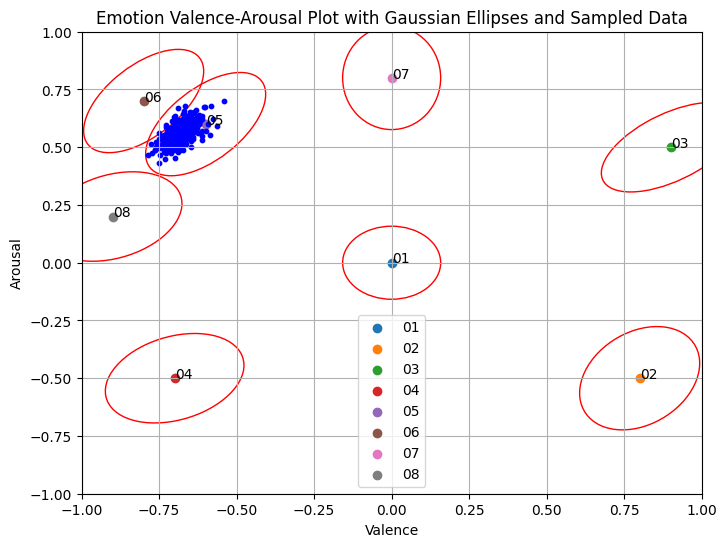

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse



# テキストファイルからデータを読み込む
sampled_data = np.loadtxt('/home/zhangzehang2/emotion/interoception-txt2/Male/03-01-05-01-01-01-09.txt')

# グラフの作成
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 感情のガウス分布の楕円をプロット
for emotion, data in emotions.items():
    mean = data["mean"]
    var = data["var"]
    cov = data["cov"]

    # 楕円の描画
    lambda_, v = np.linalg.eig(np.array([[var[0], cov], [cov, var[1]]]))
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=mean, width=lambda_[0], height=lambda_[1], angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)

    # 感情の平均位置に点をプロット
    plt.scatter(*mean, label=emotion)
    plt.text(mean[0], mean[1], emotion)

# サンプリングされたデータをプロット
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], color='blue', s=10)

# 軸のラベル
plt.xlabel('Valence')
plt.ylabel('Arousal')

# グリッドの表示
plt.grid(True)

# 軸の範囲
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# タイトルの追加
plt.title('Emotion Valence-Arousal Plot with Gaussian Ellipses and Sampled Data')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()


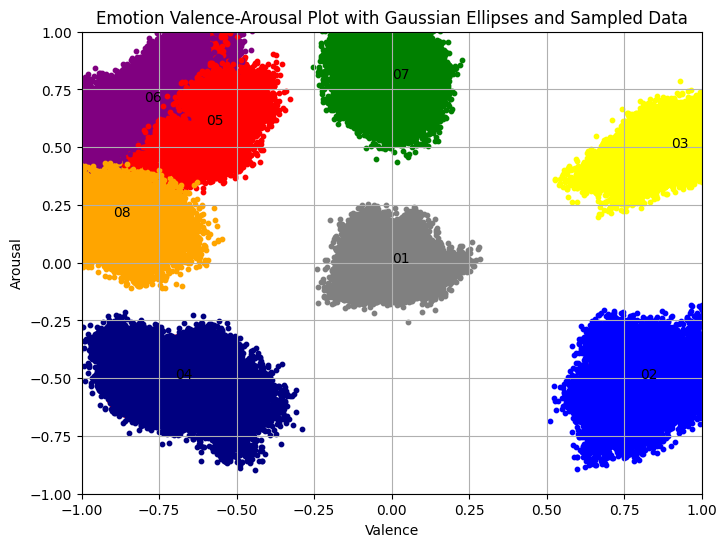

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.patches import Ellipse


colors = {
    "01": "grey",  
    "02": "blue",     
    "03": "yellow",  
    "04": "navy",  
    "05": "red",   
    "06": "purple",  
    "07": "green",     
    "08": "orange"      
}



# 文件夹路径
input_folder = '/home/zhangzehang2/emotion/interoception-txt2/Female'

# 创建图形
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 绘制情绪的高斯分布椭圆
# ...（与之前相同的代码）...
# 感情のガウス分布の楕円をプロット
for emotion, data in emotions.items():
    mean = data["mean"]
    var = data["var"]
    cov = data["cov"]

    # 楕円の描画
    lambda_, v = np.linalg.eig(np.array([[var[0], cov], [cov, var[1]]]))
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=mean, width=lambda_[0], height=lambda_[1], angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)

    # 感情の平均位置に点をプロット
    plt.scatter(*mean, label=emotion)
    plt.text(mean[0], mean[1], emotion)
# 遍历文件夹中的所有文本文件
for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        filepath = os.path.join(input_folder, filename)
        sampled_data = np.loadtxt(filepath)
        emotion_code = filename.split('-')[2]  # 假设情绪代码在文件名的特定位置
        color = colors.get(emotion_code, "black")  # 如果找不到颜色，则默认为黑色
        plt.scatter(sampled_data[:, 0], sampled_data[:, 1], color=color, s=10, label=emotion_code)

# 设置图表元素
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.grid(True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Emotion Valence-Arousal Plot with Gaussian Ellipses and Sampled Data')


# 显示图形
plt.show()


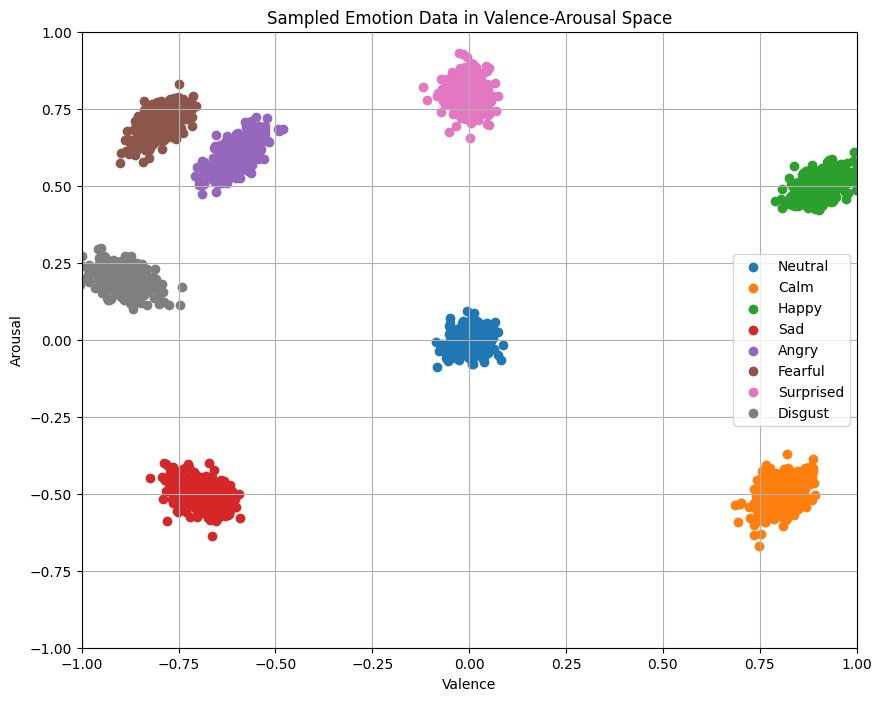

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 感情とそれに対応する平均、分散、共分散
emotions = {
    "Neutral": {"mean": (0, 0), "var": (0.1, 0.1), "cov": 0},
    "Calm": {"mean": (0.8, -0.5), "var": (0.15, 0.2), "cov": 0.05},
    "Happy": {"mean": (0.9, 0.5), "var": (0.2, 0.15), "cov": 0.1},
    "Sad": {"mean": (-0.7, -0.5), "var": (0.2, 0.15), "cov": -0.05},
    "Angry": {"mean": (-0.6, 0.6), "var": (0.15, 0.2), "cov": 0.1},
    "Fearful": {"mean": (-0.8, 0.7), "var": (0.15, 0.2), "cov": 0.1},
    "Surprised": {"mean": (0, 0.8), "var": (0.1, 0.2), "cov": 0},
    "Disgust": {"mean": (-0.9, 0.2), "var": (0.2, 0.15), "cov": -0.05}
}

# サンプリング関数
def sample_emotion(emotion, num_samples=300):
    mean = emotions[emotion]["mean"]
    cov_matrix = [[emotions[emotion]["var"][0], emotions[emotion]["cov"]], 
                  [emotions[emotion]["cov"], emotions[emotion]["var"][1]]]
    cov_matrix = np.array(cov_matrix) * 0.01
    return np.random.multivariate_normal(mean, cov_matrix, num_samples)

# プロットの設定
plt.figure(figsize=(10, 8))

# 各感情に対してサンプリングしてプロット
for emotion in emotions:
    samples = sample_emotion(emotion)
    plt.scatter(samples[:, 0], samples[:, 1], label=emotion)

# 軸のラベル
plt.xlabel('Valence')
plt.ylabel('Arousal')

# グリッドの表示
plt.grid(True)

# 軸の範囲
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# タイトルの追加
plt.title('Sampled Emotion Data in Valence-Arousal Space')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()
